#
....0- Airplanes
......1- Cars
.......2- Birds
........3- Cats
........4- Deer
......5- Dogs
......6- Frogs
.........7- Horses
.......8- Ships
.........9- Trucks

# ## IMPORT THE DATA ## #


In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

2024-03-10 11:30:15.480022: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 11:30:15.480078: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 11:30:15.481477: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_test.shape 

(10000, 1)

# ## VISUALIZE DATA ## #

[3]


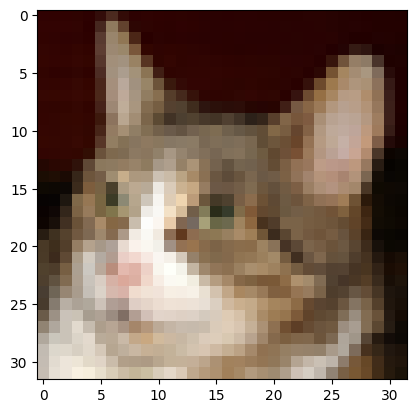

In [9]:
i = 911
plt.imshow(X_test[i])
print(y_test[i])

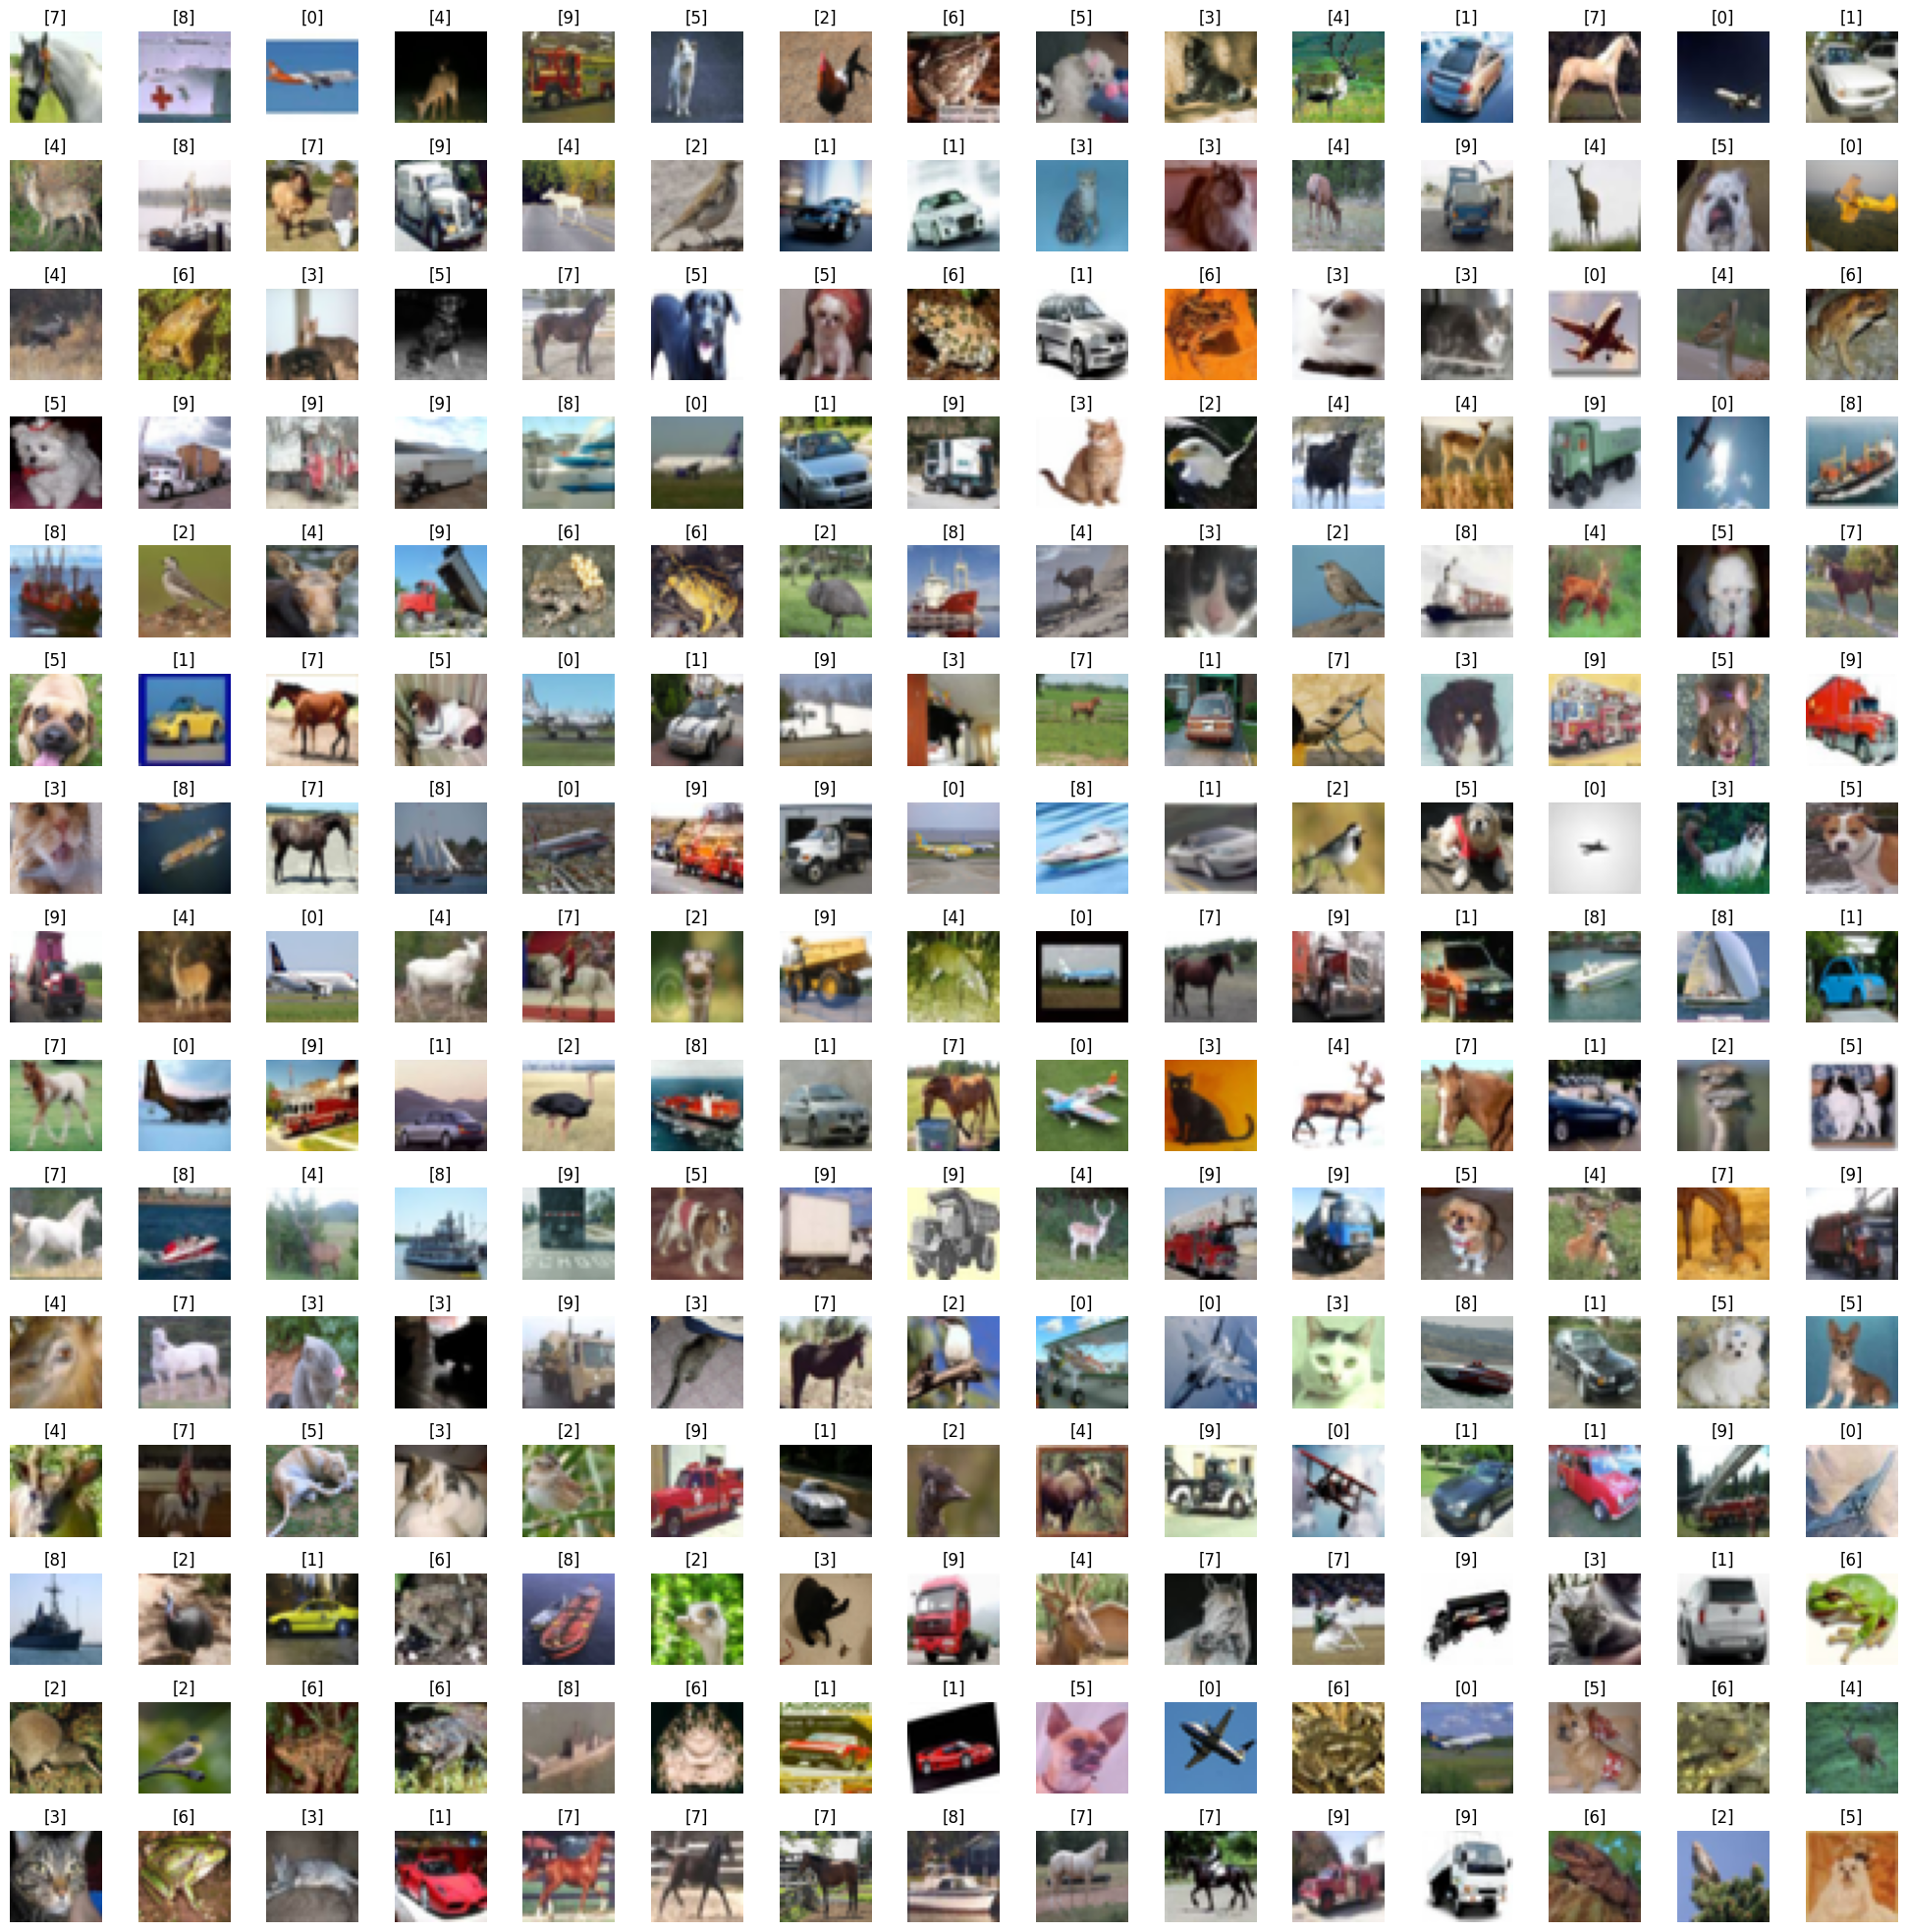

In [10]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))

axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) #pick a random number 
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)    
    

In [11]:
n_training

50000

# ## Data Preparation ## #


In [12]:
X_train =  X_train.astype('float32')
X_test =  X_test.astype('float32')

In [13]:
numb_cat = 10

In [14]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [15]:
import keras
y_train = keras.utils.to_categorical(y_train, numb_cat)

In [16]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
y_test = keras.utils.to_categorical(y_test, numb_cat)

In [18]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [19]:
X_train = X_train/255
X_test = X_test/255

In [20]:
X_train 

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [21]:
Input_shape = X_train.shape[1:]

In [22]:
Input_shape

(32, 32, 3)

In [23]:
print(X_train.shape[0]) 

50000


In [24]:
X_train.shape

(50000, 32, 32, 3)

# ## TRAIN THE MODLE ## #

In [25]:
# Conv2D - convulsions process
# MaxPooling2d - Downsampling, Subsampling(reducing the D of the image)
# AveragePooling2D - averge the pixels within our filter
# Flatten - which is simply used to just flatten our array.
# Dropout - just simply perform some regularization, which is just dropping a couple of the neurons along with the associated weights, just to improve the generalization capability of the network.

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,  AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [31]:
try:
  import tensorflow as tf
  print("TensorFlow is available!")
except ImportError:
  print("TensorFlow is not available in this kernel.")

TensorFlow is available!


In [32]:
from tensorflow.keras.utils import to_categorical

In [34]:
X_train.shape

(50000, 32, 32, 3)

In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dropout, Flatten, Dense, BatchNormalization
from keras.optimizers import RMSprop
from keras.callbacks import LearningRateScheduler
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define model architecture
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(AveragePooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=1024, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(units=512, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(units=10, activation='softmax'))

# Compile model
cnn_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(X_train)

# Learning rate scheduler
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 50:
        lr *= 0.1
    if epoch > 75:
        lr *= 0.1
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# Training the model with data augmentation and learning rate scheduling
history = cnn_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=100,
    steps_per_epoch=len(X_train) / 32,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler]
)

# Evaluate model
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/100


2024-03-10 11:30:38.085950: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1710070241.282231     173 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1562/1562 [==============================] - 45s 25ms/step - loss: 1.8751 - accuracy: 0.3763 - val_loss: 1.4941 - val_accuracy: 0.4758 - lr: 0.0010
Epoch 2/100
1562/1562 [==============================] - 37s 24ms/step - loss: 1.3702 - accuracy: 0.5145 - val_loss: 1.0383 - val_accuracy: 0.6384 - lr: 0.0010
Epoch 3/100
1562/1562 [==============================] - 37s 24ms/step - loss: 1.2343 - accuracy: 0.5679 - val_loss: 1.1051 - val_accuracy: 0.6217 - lr: 0.0010
Epoch 4/100
1562/1562 [==============================] - 37s 24ms/step - loss: 1.1438 - accuracy: 0.6013 - val_loss: 0.9961 - val_accuracy: 0.6528 - lr: 0.0010
Epoch 5/100
1562/1562 [==============================] - 37s 24ms/step - loss: 1.0749 - accuracy: 0.6263 - val_loss: 0.8774 - val_accuracy: 0.6974 - lr: 0.0010
Epoch 6/100
1562/1562 [==============================] - 37s 24ms/step - loss: 1.0255 - accuracy: 0.6439 - val_loss: 0.8420 - val_accuracy: 0.7041 - lr: 0.0010
Epoch 7/100
1562/1562 [=============================

# ## EVALUATE THE MODEL ## #

In [36]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.4142 - accuracy: 0.8610
Test Accuracy 0.8610000014305115


In [37]:
# Assuming cnn_model.predict(X_test) returns the class probabilities
predictions = cnn_model.predict(X_test)

# Get the predicted classes
prediction_classes = np.argmax(predictions, axis=1)
prediction_classes

313/313 [==============================] - 1s 2ms/step


array([3, 8, 8, ..., 5, 1, 7])

In [38]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [39]:
y_test = y_test.argmax(1)

In [40]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

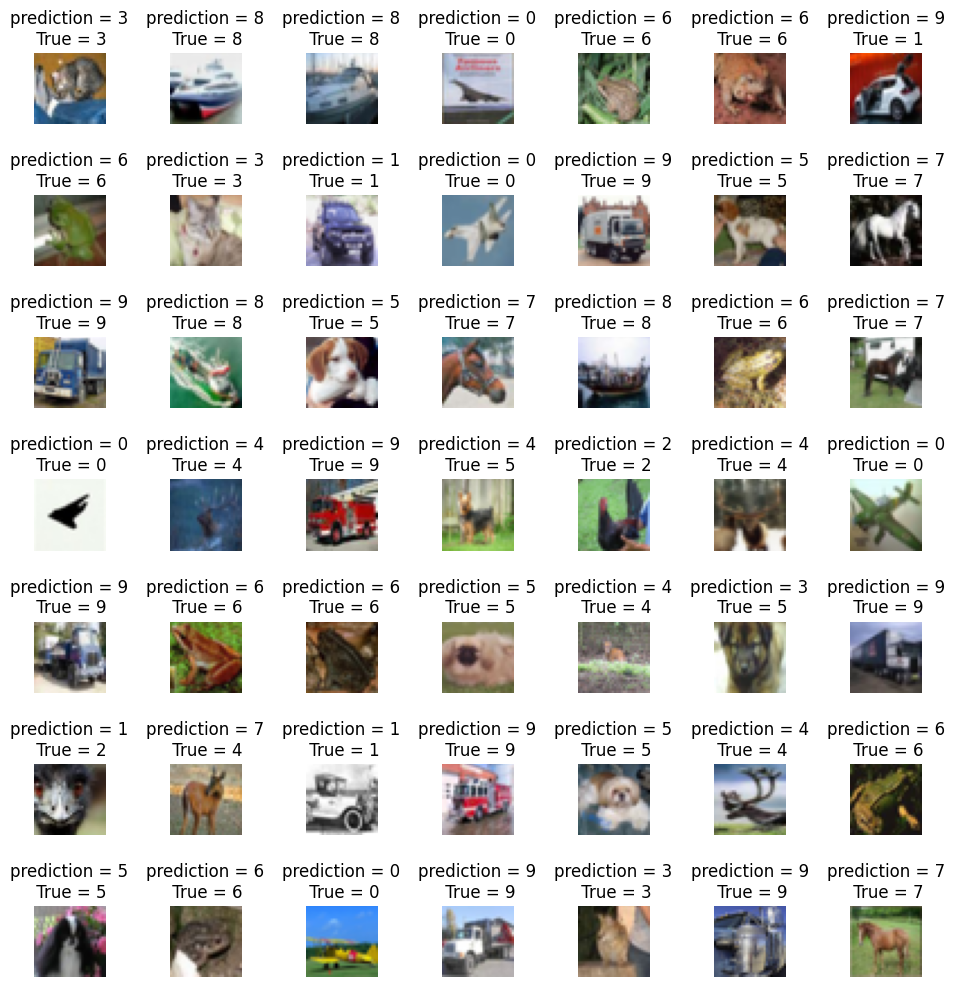

In [41]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize =  (12,12) )
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('prediction = {}\n True = {}'.format(prediction_classes[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 1)   


<Axes: >

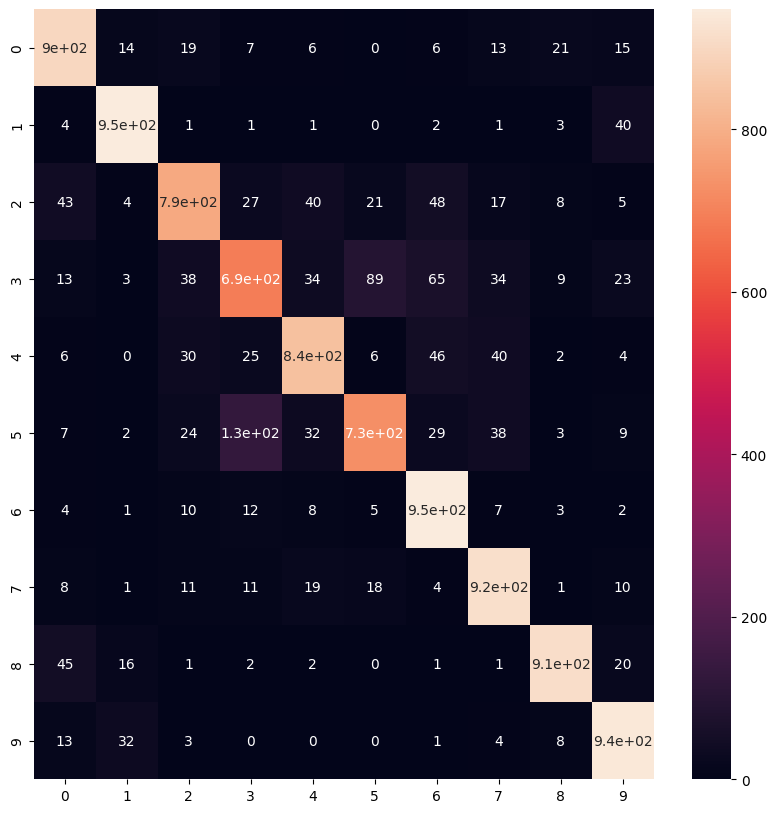

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, prediction_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

# Saving The Model #

In [43]:
import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Data Augmentaion For CIFAR-10 DataSet #

In [44]:
# import keras
# from keras.datasets import cifar10
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [45]:
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')

In [46]:
# X_train.shape

In [47]:
# n = 8 
# X_train_sample = X_train[:n]

In [48]:
# X_train_sample.shape

In [49]:
# from keras.preprocessing.image import ImageDataGenerator

# dataget_train = ImageDataGenerator(rotation_range = 0)
# # dataget_train = ImageDataGenerator(vertical_flip=True)
# # dataget_train = ImageDataGenerator(height_shift_range=0.5)
# # dataget_train = ImageDataGenerator(brightness_range=(1,3))


# dataget_train.fit(X_train_sample)

In [50]:
# from keras.preprocessing.image import ImageDataGenerator
# import matplotlib.pyplot as plt

# # Assuming you have loaded CIFAR-10 images into X_train_sample
# dataget_train = ImageDataGenerator(rotation_range=90)
# dataget_train.fit(X_train_sample)

# n = 8  # Number of images to display

# fig, axes = plt.subplots(1, n, figsize=(20, 2))

# for x_batch in dataget_train.flow(X_train_sample, batch_size=n):
#     for i in range(n):
#         axes[i].imshow(x_batch[i].astype('uint8'))
#         axes[i].axis('off')
#     plt.show()
#     break


# MODEL TRAINING USING AUGEMENTED DATASET # 

In [1]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dropout, Flatten, Dense
# from keras.optimizers import RMSprop
# from keras.datasets import cifar10
# from keras.utils import to_categorical
# from keras.preprocessing.image import ImageDataGenerator

# # Load CIFAR-10 dataset
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()

# # Preprocess data
# X_train = X_train.astype('float32') / 255.0
# X_test = X_test.astype('float32') / 255.0
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)

# # Define model architecture
# cnn_model = Sequential()
# cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
# cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# cnn_model.add(AveragePooling2D(pool_size=(2, 2)))
# cnn_model.add(Dropout(0.4))

# cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
# cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
# cnn_model.add(Dropout(0.4))

# cnn_model.add(Flatten())
# cnn_model.add(Dense(units=1024, activation='relu'))
# cnn_model.add(Dense(units=1024, activation='relu'))
# cnn_model.add(Dense(units=10, activation='softmax'))

# # Compile model
# cnn_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

# # Data augmentation
# datagen = ImageDataGenerator(
#     rotation_range=90,
#     width_shift_range=0.1,
#     horizontal_flip=True,
#     vertical_flip=True
# )
# datagen.fit(X_train)

# # Training the model with augmented data
# history = cnn_model.fit_generator(
#     datagen.flow(X_train, y_train, batch_size=32),
#     epochs=100
# )

# # Evaluate model
# loss, accuracy = cnn_model.evaluate(X_test, y_test)
# print(f'Test Loss: {loss:.4f}')
# print(f'Test Accuracy: {accuracy:.4f}')